In [1]:
library(reticulate)
library(GenomicRanges)
library(ggplot2)
library(ggthemes)


Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The follow

In [2]:
# ATAC-seq peaks that overlap/do not overlap with H3K27ac

a_distinct       <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/scATAC_10x/H3K27ac_ATAC_overlap/bigwig_summary_distinct.tsv')
a_shared         <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/scATAC_10x/H3K27ac_ATAC_overlap/bigwig_summary_shared.tsv')

a_distinct$class <- 'only ATAC'
a_shared$class   <- 'ATAC+H3K27ac'

a <- rbind(a_shared,a_distinct)


ATAC+H3K27ac    only ATAC 
       12853         2247 

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 112 rows containing non-finite values (stat_density2d)."


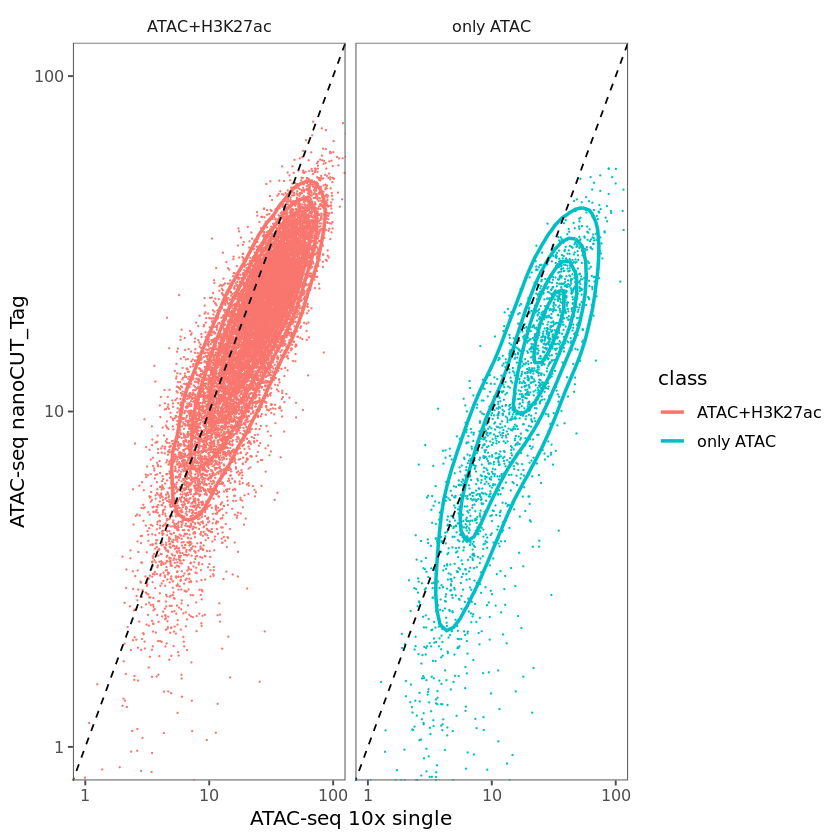

In [3]:
table(a$class)


ggplot(data=a,aes(x=V6,y=V7,col=class,fill=class)) + 
    geom_density_2d(aes(col=class),size=1) + 
    geom_point(size = 0.005) + 
    scale_x_log10() + scale_y_log10() + 
    coord_cartesian(xlim=c(1,100),ylim=c(1,100)) + 
    xlab('ATAC-seq 10x single') + ylab('ATAC-seq nanoCUT_Tag') + theme_few()+ geom_abline(slope=1,lty=2) + facet_wrap(~class)

In [4]:
# H3K27ac peaks that overlap/do not overlap with ATAC-seq

a_distinct       <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/scATAC_10x/H3K27ac_ATAC_overlap_2/bigwig_summary_distinct.tsv')
a_shared         <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/scATAC_10x/H3K27ac_ATAC_overlap_2/bigwig_summary_shared.tsv')

a_distinct$class <- 'only H3K27ac'
a_shared$class   <- 'H3K27ac+ATAC'

a <- rbind(a_shared,a_distinct)
head(a)

V1   V2      V3      V4        V5       V6       V7        class       
1 chr1 4785100 4786146 0.9478078 4.362707 23.49648 18.564373 H3K27ac+ATAC
2 chr1 4856460 4859775 3.4950514 3.925958 22.63459 16.392194 H3K27ac+ATAC
3 chr1 4968784 4971304 1.2438417 4.124291  7.65059  3.500322 H3K27ac+ATAC
4 chr1 5014855 5026345 2.3657605 7.327910 20.72955 17.601790 H3K27ac+ATAC
5 chr1 5032675 5034574 0.8610020 4.249045 20.91193  9.932492 H3K27ac+ATAC
6 chr1 6213310 6217420 3.1006331 3.946360 11.79887 12.498914 H3K27ac+ATAC


H3K27ac+ATAC only H3K27ac 
       12408        23993 

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 1258 rows containing non-finite values (stat_density2d)."


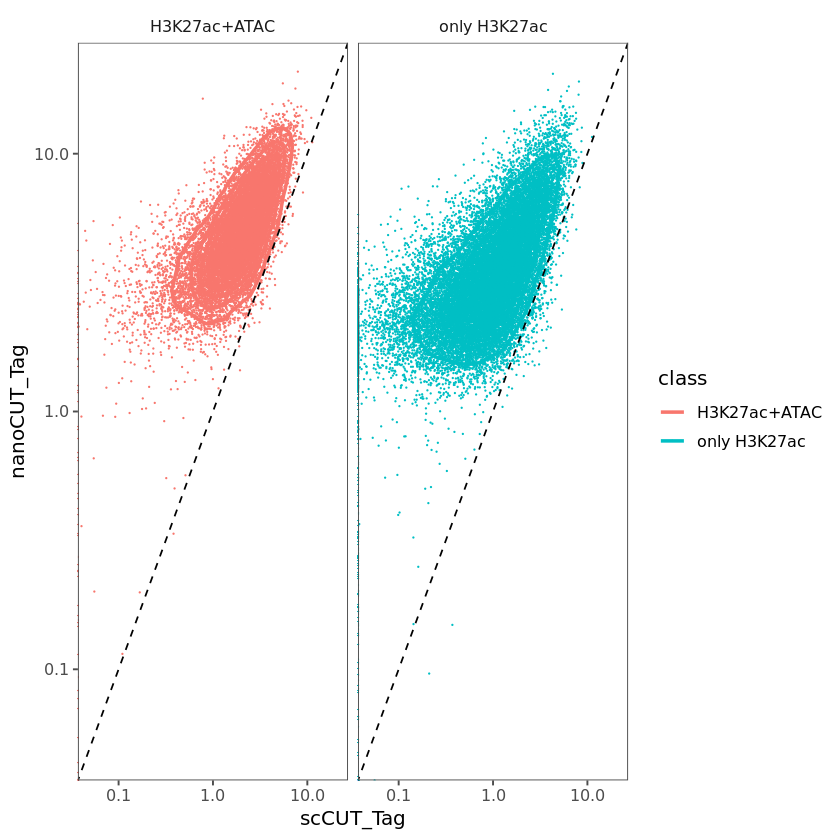

In [5]:
table(a$class)

ggplot(data=a,aes(x=V4,y=V5,col=class,fill=class)) + 
    geom_density_2d(aes(col=class),size=1) + 
    geom_point(size = 0.005) + 
    scale_x_log10() + scale_y_log10() + 
    coord_cartesian(xlim=c(0.05,20),ylim=c(0.05,20)) + 
    xlab('scCUT_Tag') + ylab('nanoCUT_Tag') + theme_few() + geom_abline(slope=1,lty=2) + facet_wrap(~class)

In [200]:
d <- read.table(file='/data/proj/GCB_MB/bcd_CT/single-cell/results/scATAC_10x/H3K27ac_ATAC_overlap_3/bigwig_summary_all.tsv')

In [208]:
d.zscore <- d[,c('V4','V5','V6','V7')]
d.zscore <- apply(d.zscore, 2, function(x){x <- as.numeric(x); ((x-mean(x)) / sd(x)) })

V4          V5          V6          V7          
 [1,] -0.60776837 -1.35247072 -0.09283524 -0.002585647
 [2,] -0.78552409 -1.19094266 -0.16997759 -0.102459117
 [3,] -0.40664467  0.15362295  0.79103829  1.550430272
 [4,] -0.27033557  0.40421109  0.58872168  1.521087849
 [5,] -0.43649698 -1.04681195 -0.40944820 -0.898966766
 [6,]  1.61069628 -0.04291425  0.74415529  1.251000153
 [7,] -0.50765043 -0.87670766 -0.35810453 -0.867022321
 [8,] -0.19794933  0.02830500 -0.26682105 -0.213334448
 [9,] -0.86626881 -1.02614640 -0.46047755 -0.829501066
[10,] -0.17219467  0.04633557 -0.07090416 -0.526116216
[11,] -0.55743400 -0.74907403 -0.43604494 -0.806759159
[12,]  0.71633154  1.48796324  0.64053027  1.417740252
[13,] -0.47539224  0.10247506  0.65045096  0.360544353
[14,] -0.69104163 -0.34422502  0.38856693  1.332266208
[15,] -0.96795025 -1.20178869 -0.43650081 -0.876555485
[16,] -1.15728016 -1.66293627 -0.45886330 -0.668052523
[17,]  1.19212054 -0.05135738  0.11684915  0.618173626
[18,] -0.27704313 -0.91099640 -0.41637998 -0.876833688
[19,]  1.55276543  0.39730619  0.74900212  1.281083089
[20,]  0.91350270 -0.77721680 -0.41810812 -0.685739063
[21,] -0.02154059 -0.64097431 -0.44652865 -0.824747873
[22,]  1.46184846 -0.18419379 -0.40703378 -0.557650161
[23,]  1.61006860 -0.45040906  2.29468011  3.544465639
[24,] -0.68503792 -1.45556152 -0.46213622 -0.801628939
[25,]  0.41276004 -0.33621264 -0.29438904 -0.365493656
[26,] -0.60075311 -1.39631556 -0.36378101 -0.532167275
[27,]  1.48187128  0.65605240  0.07315954  0.351846326
[28,]  1.10651139 -0.09295509 -0.31736284 -0.647587209
[29,] -0.35220640 -0.39331592 -0.25373816 -0.299951490
[30,]  0.83227995 -0.14676628  0.06662840  0.487778014
[31,] <U+22EE>    <U+22EE>    <U+22EE>    <U+22EE>    
[32,]  1.55054808  0.86406505 -0.18159489 -0.16400538 
[33,]  0.84313711  0.22297799 -0.19443928 -0.33742029 
[34,]  1.93783853  0.27086959  0.40257440  1.12317382 
[35,] -0.25766896 -0.69844523 -0.43825087 -0.83388838 
[36,]  0.36579609 -0.40732908  0.07038762 -0.08947529 
[37,] -0.49009389 -1.00162945 -0.35068199 -0.60994956 
[38,] -0.04229385 -0.02289131  0.29521895  0.23429807 
[39,] -1.03368496 -0.41407760 -0.40807016 -0.77345479 
[40,] -0.04296273 -0.44213722 -0.25827459 -0.40609286 
[41,] -0.28668924 -0.55642551 -0.36584431 -0.47622800 
[42,] -0.60386880 -0.65213114 -0.43108480 -0.46031113 
[43,] -0.40844759 -0.59264481 -0.24352529 -0.34297730 
[44,] -0.17463272 -0.39025636 -0.17912719 -0.34665227 
[45,]  0.69324315 -0.08502835  0.60861114  2.07445253 
[46,]  0.65249172 -0.68504538  0.20920675  0.28460813 
[47,]  0.55548450 -0.47729404 -0.23329455 -0.56717158 
[48,] -0.63306551 -0.64434247  0.56955396  0.15697559 
[49,] -0.59738614 -0.79736165 -0.41255846 -0.81804852 
[50,] -0.49130300 -0.62434521 -0.37366750 -0.53900893 
[51,] -0.39725651 -1.14209491  0.72973206 -0.80968784 
[52,] -1.15728016 -1.69846536  0.27339464 -0.69164252 
[53,] -1.15728016 -1.80959379 -0.48706045 -1.00862799 
[54,] -1.10836811 -1.52296033  0.83536618 -0.42993383 
[55,] -0.86765490 -1.08150847 -0.48706045 -0.23611455 
[56,] -1.15728016 -1.80959379 -0.48706045 -1.00862799 
[57,] -0.09646867 -1.25485535  2.70956891  0.65645821 
[58,] -1.15728016 -1.80959379 -0.48706045 -1.00862799 
[59,] -1.15728016 -1.80959379 -0.48706045 -1.00862799 
[60,] -1.07896379 -1.63097486  0.07529176 -0.82822067 
[61,] -1.15728016 -1.78644487 -0.44346486 -0.95577056

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 439 rows containing non-finite values (stat_density)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 382 rows containing non-finite values (stat_density)."


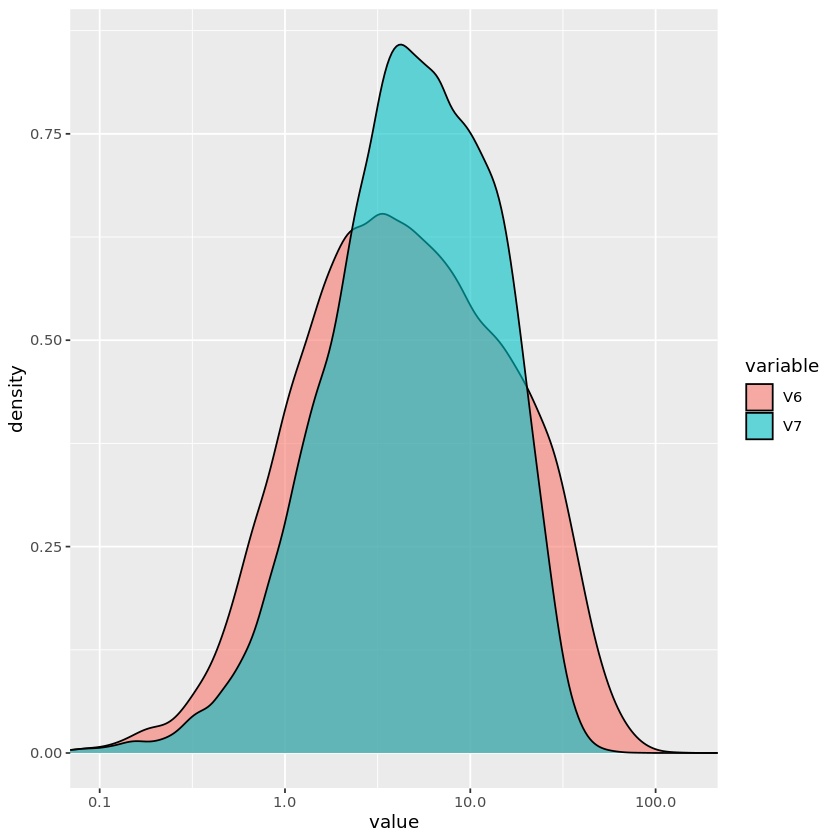

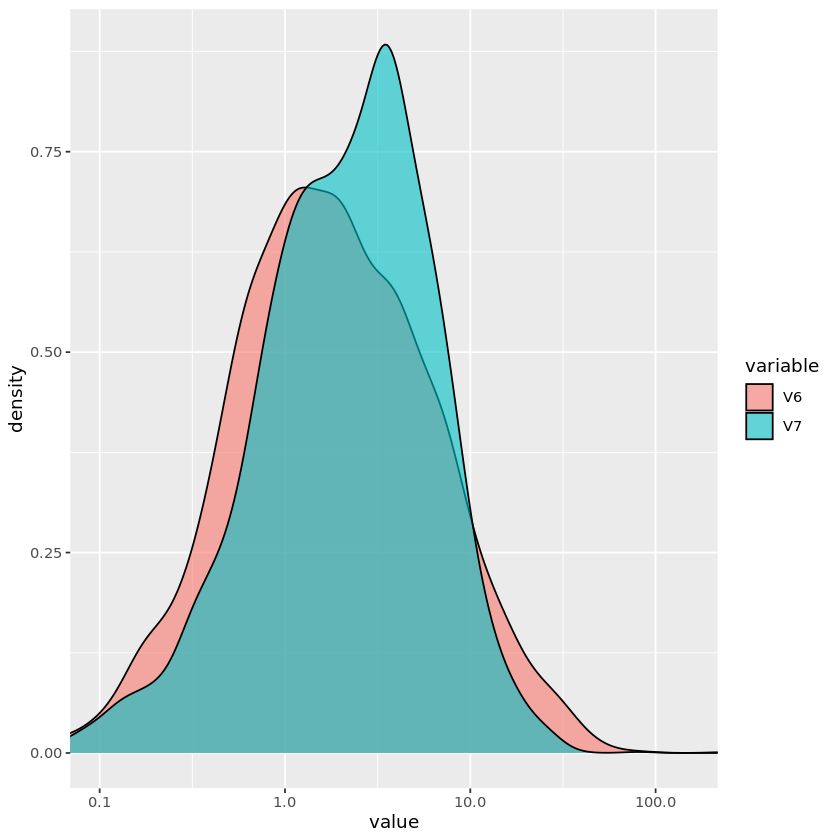

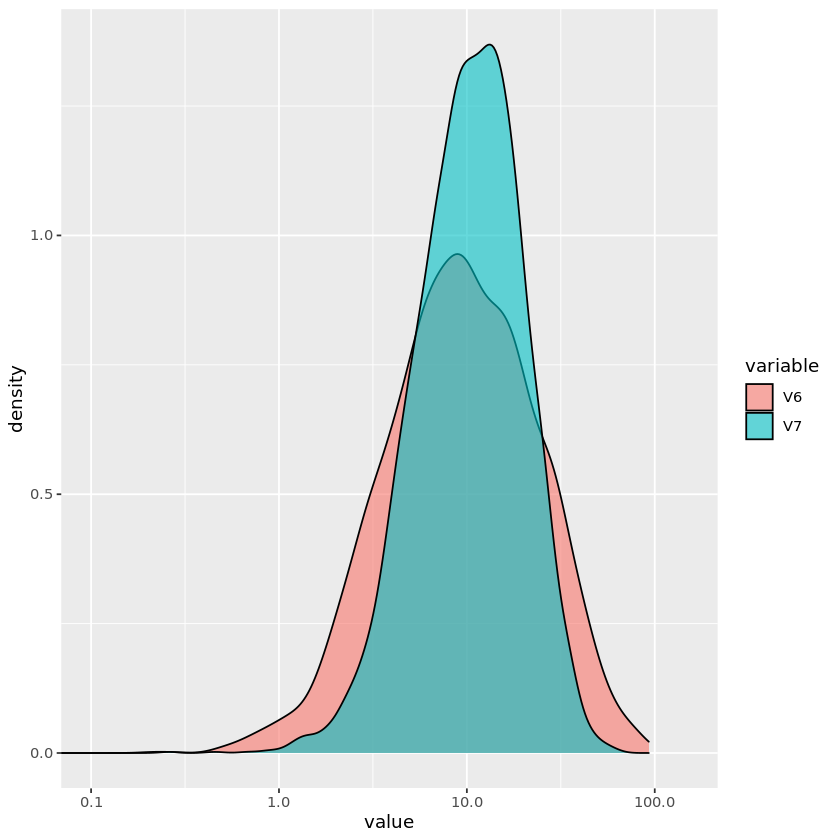

In [145]:
library(reshape2)
d.all  <- melt(d[,c('V6','V7')])
d.low  <- melt(d[d$V4 < quantile(d$V4,0.1),c('V6','V7')])
d.high <- melt(d[d$V4 > quantile(d$V4,0.9),c('V6','V7')])



ggplot(data = d.all) + geom_density(aes(x=value,fill=variable),alpha=0.6,color='black') + scale_x_log10() + coord_cartesian(xlim=c(0.1,150))
ggplot(data = d.low) + geom_density(aes(x=value,fill=variable),alpha=0.6,color='black') + scale_x_log10() + coord_cartesian(xlim=c(0.1,150))
ggplot(data = d.high) + geom_density(aes(x=value,fill=variable),alpha=0.6,color='black') + scale_x_log10() + coord_cartesian(xlim=c(0.1,150))




Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 275 rows containing non-finite values (stat_density2d)."


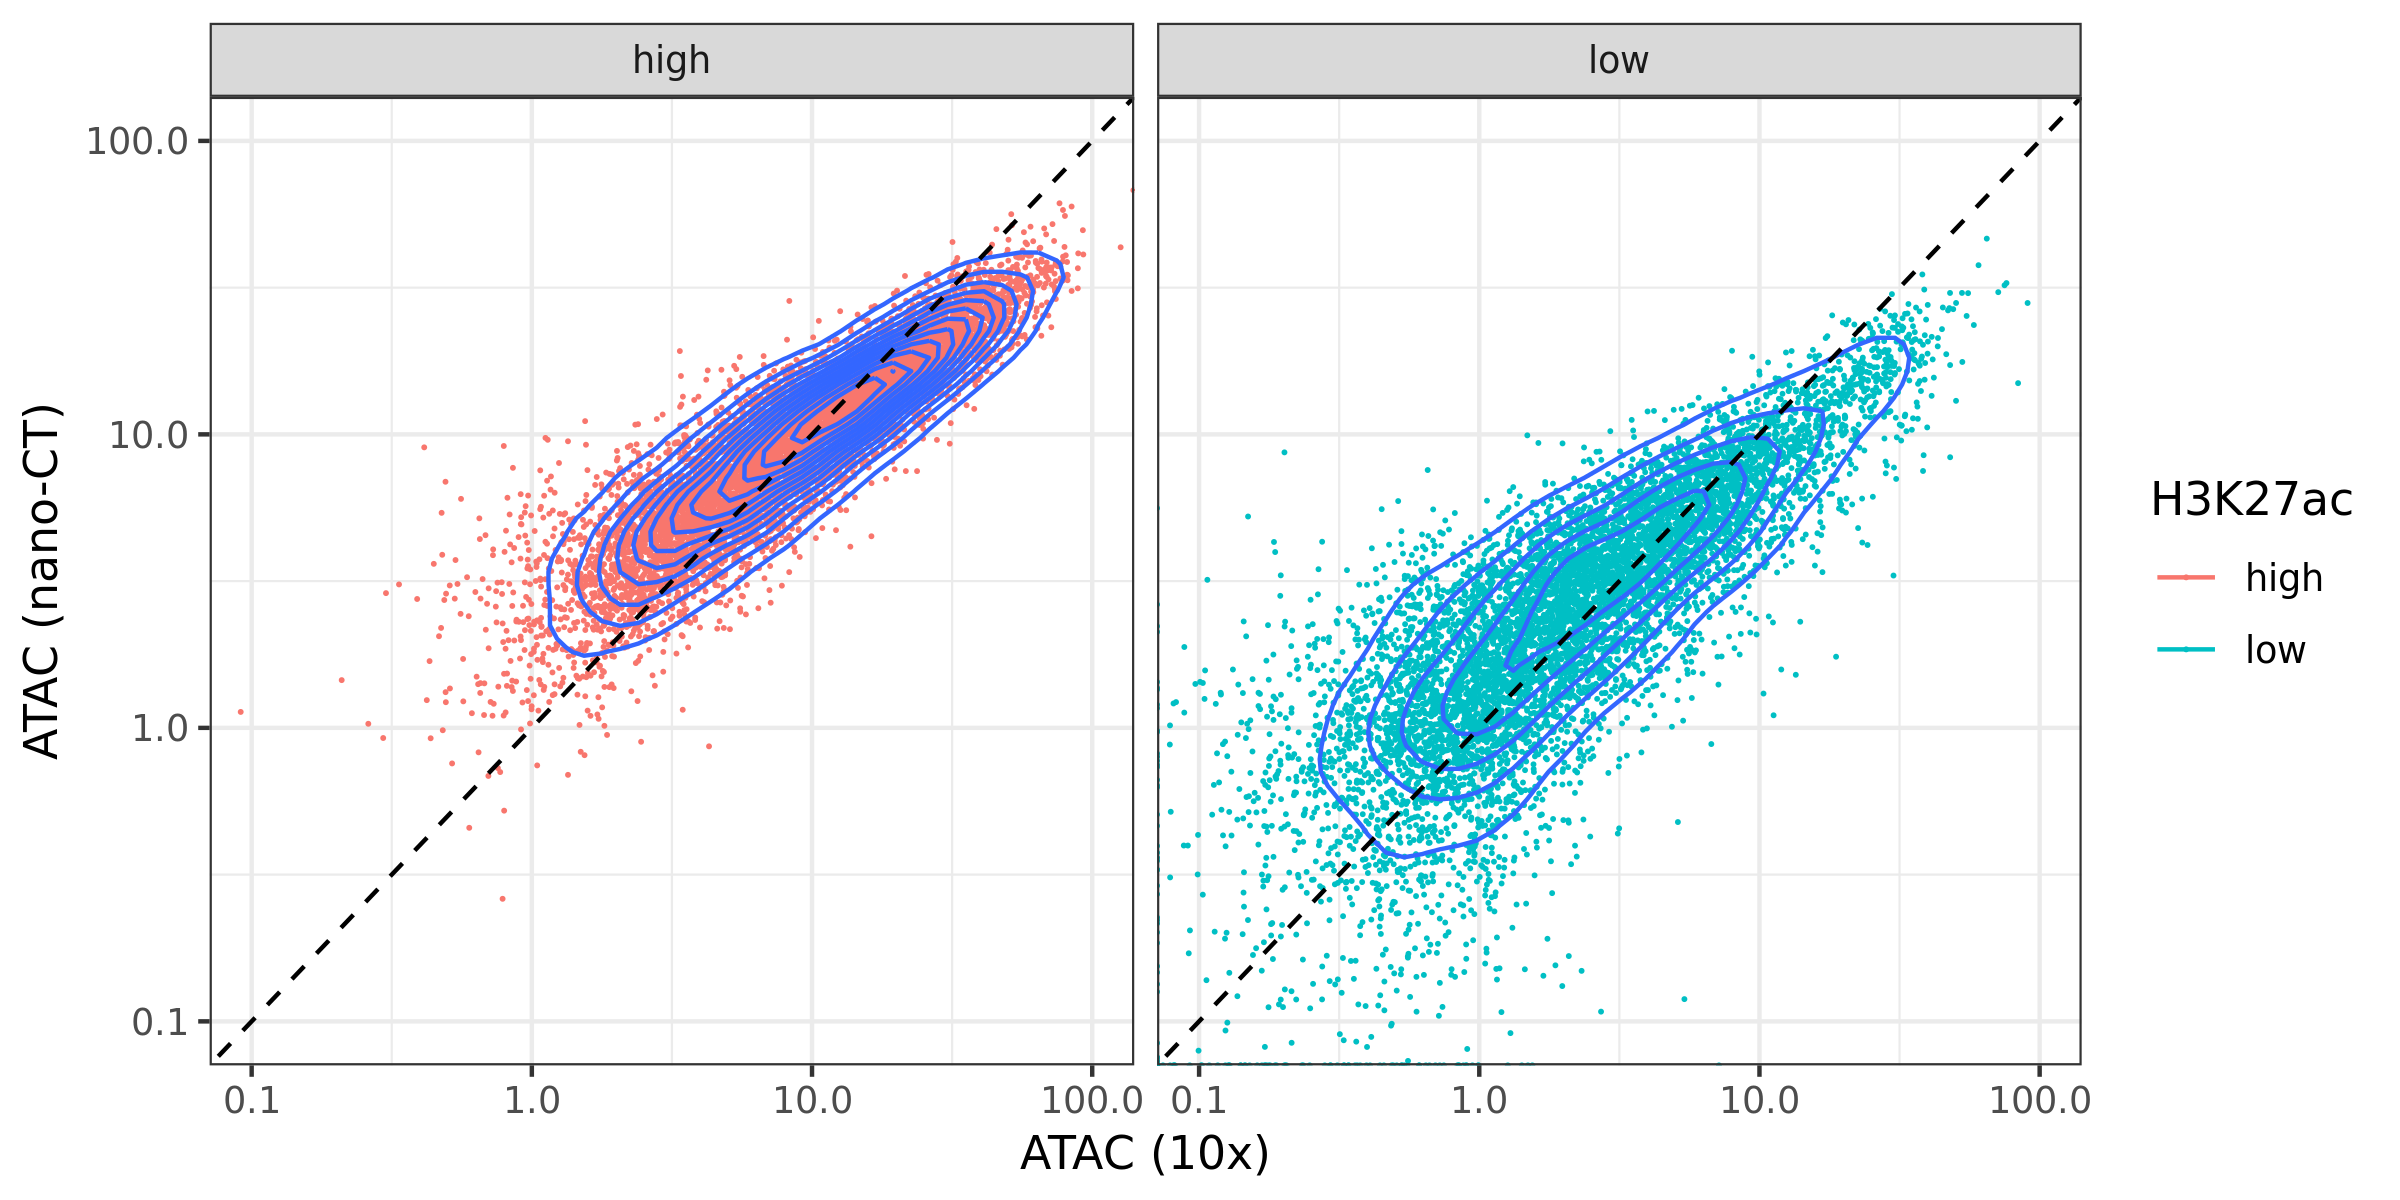

In [152]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)
d.low         <- d[d$V4 < quantile(d$V4,0.2),c('V6','V7')]
d.low$H3K27ac <- 'low'
d.high <- d[d$V4 > quantile(d$V4,0.8),c('V6','V7')]
d.high$H3K27ac <- 'high'

d.plot <- rbind(d.low,d.high)

ggplot(data = d.plot) + geom_point(aes(x=V6,y=V7,color=H3K27ac),size=0.001) +
    coord_cartesian(xlim=c(0.1,100),ylim=c(0.1,100)) + geom_density_2d(aes(x=V6,y=V7)) + scale_x_log10() + scale_y_log10() + 
    facet_wrap(~H3K27ac) +  geom_abline(slope=1,lty=2,lwd=0.5) + theme_bw() + xlab('ATAC (10x)') + ylab('ATAC (nano-CT)')



Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 1696 rows containing non-finite values (stat_density2d)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 1703 rows containing non-finite values (stat_density2d)."


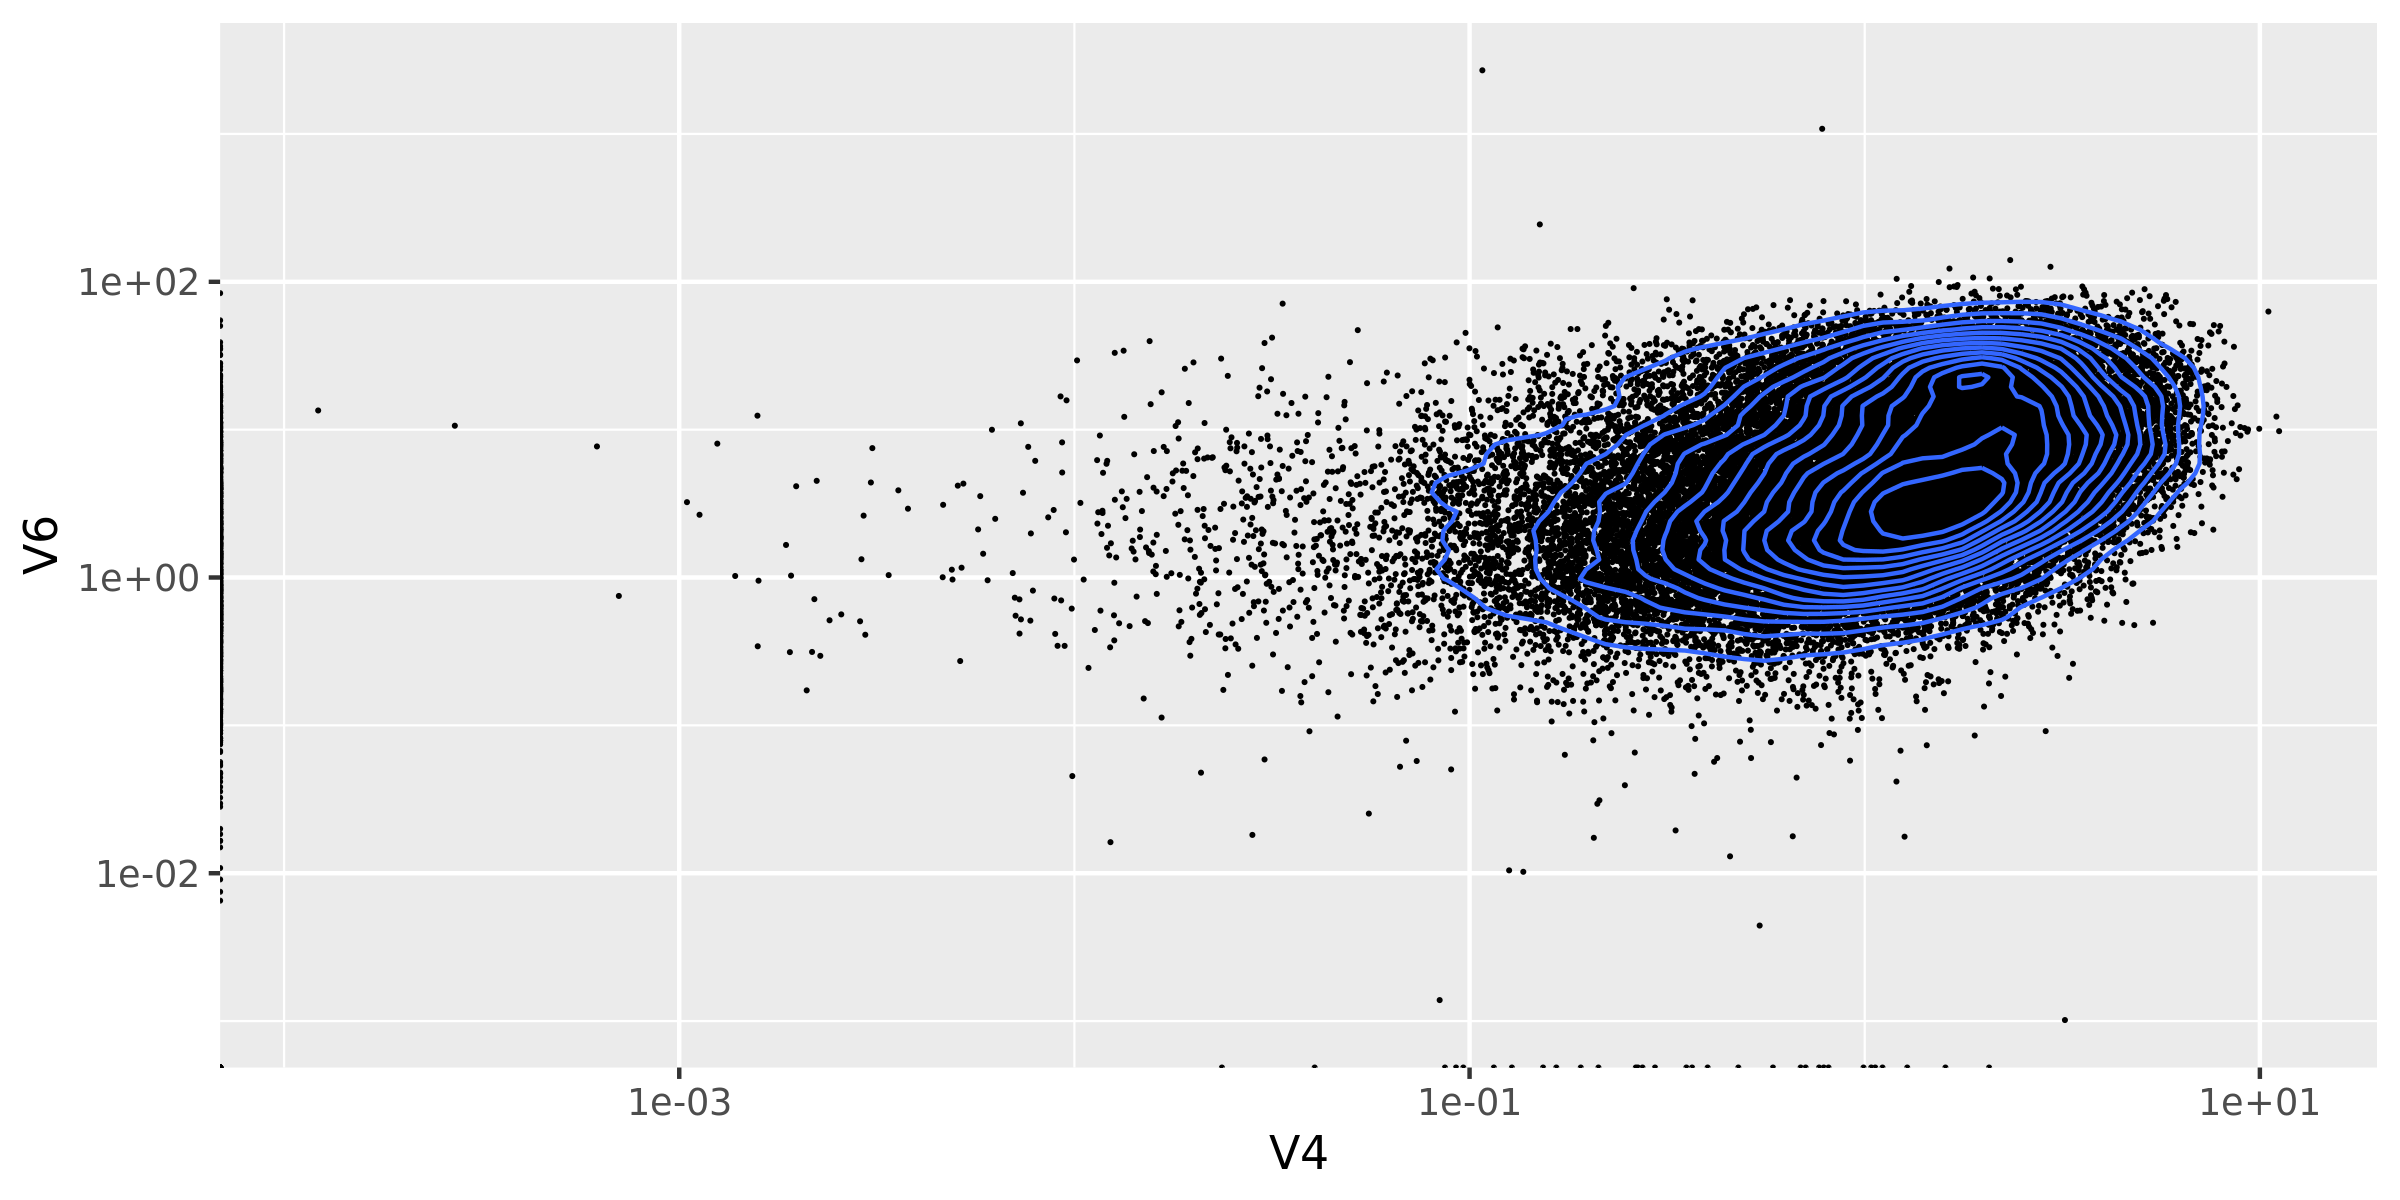

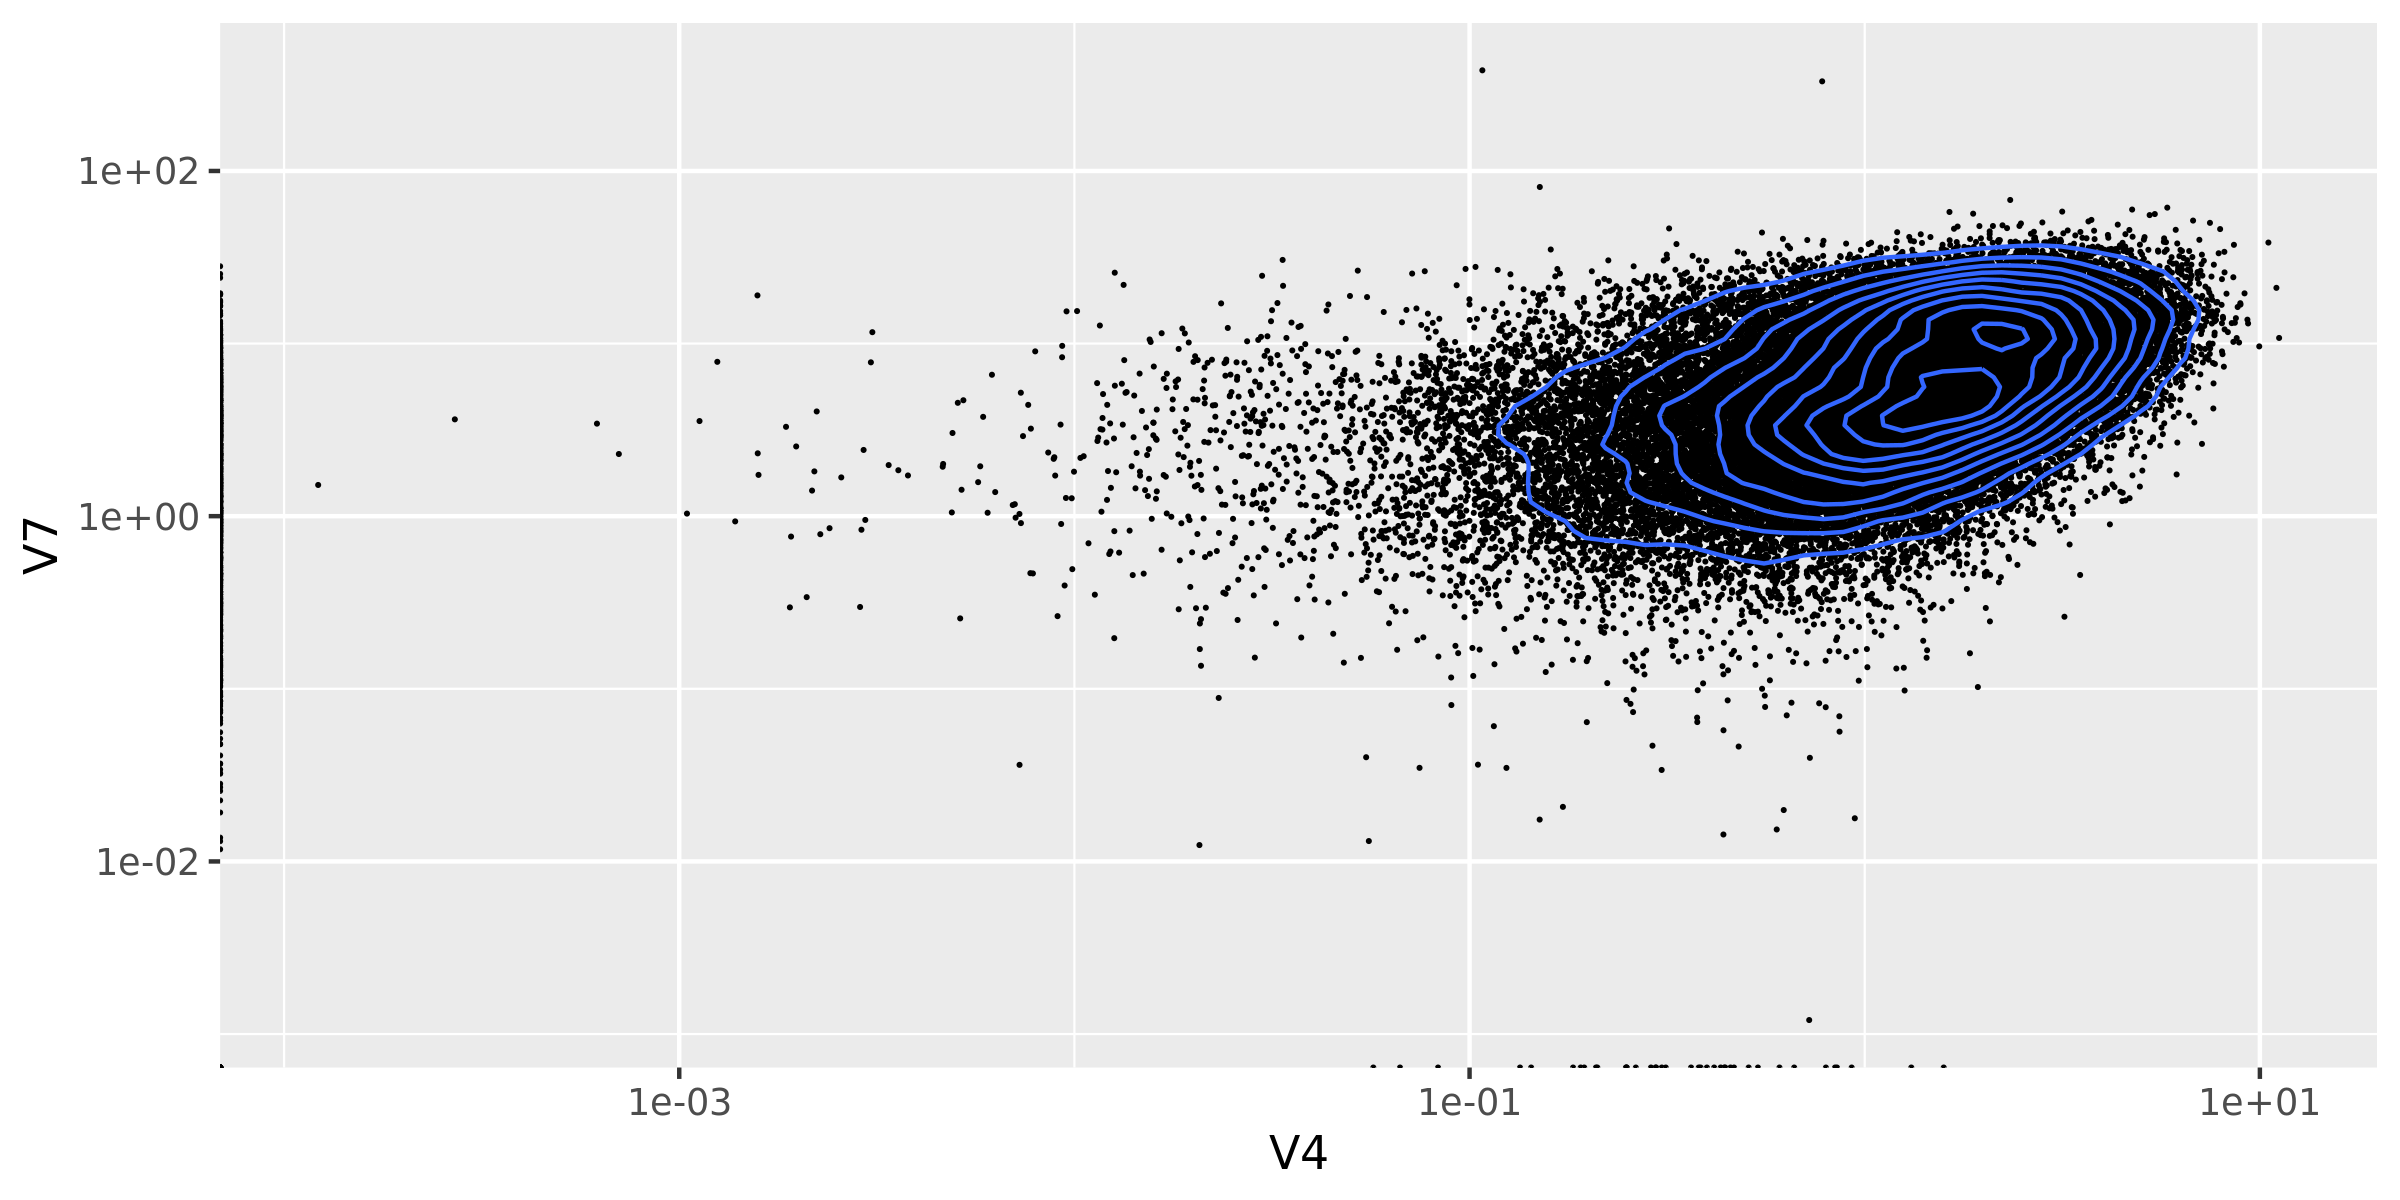

In [160]:
ggplot(data=d) + geom_point(aes(x=V4,y=V6),size=0.02) + stat_density_2d(aes(x=V4,y=V6)) + scale_x_log10() + scale_y_log10()
ggplot(data=d) + geom_point(aes(x=V4,y=V7),size=0.02) + stat_density_2d(aes(x=V4,y=V7)) + scale_x_log10() + scale_y_log10()


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', 

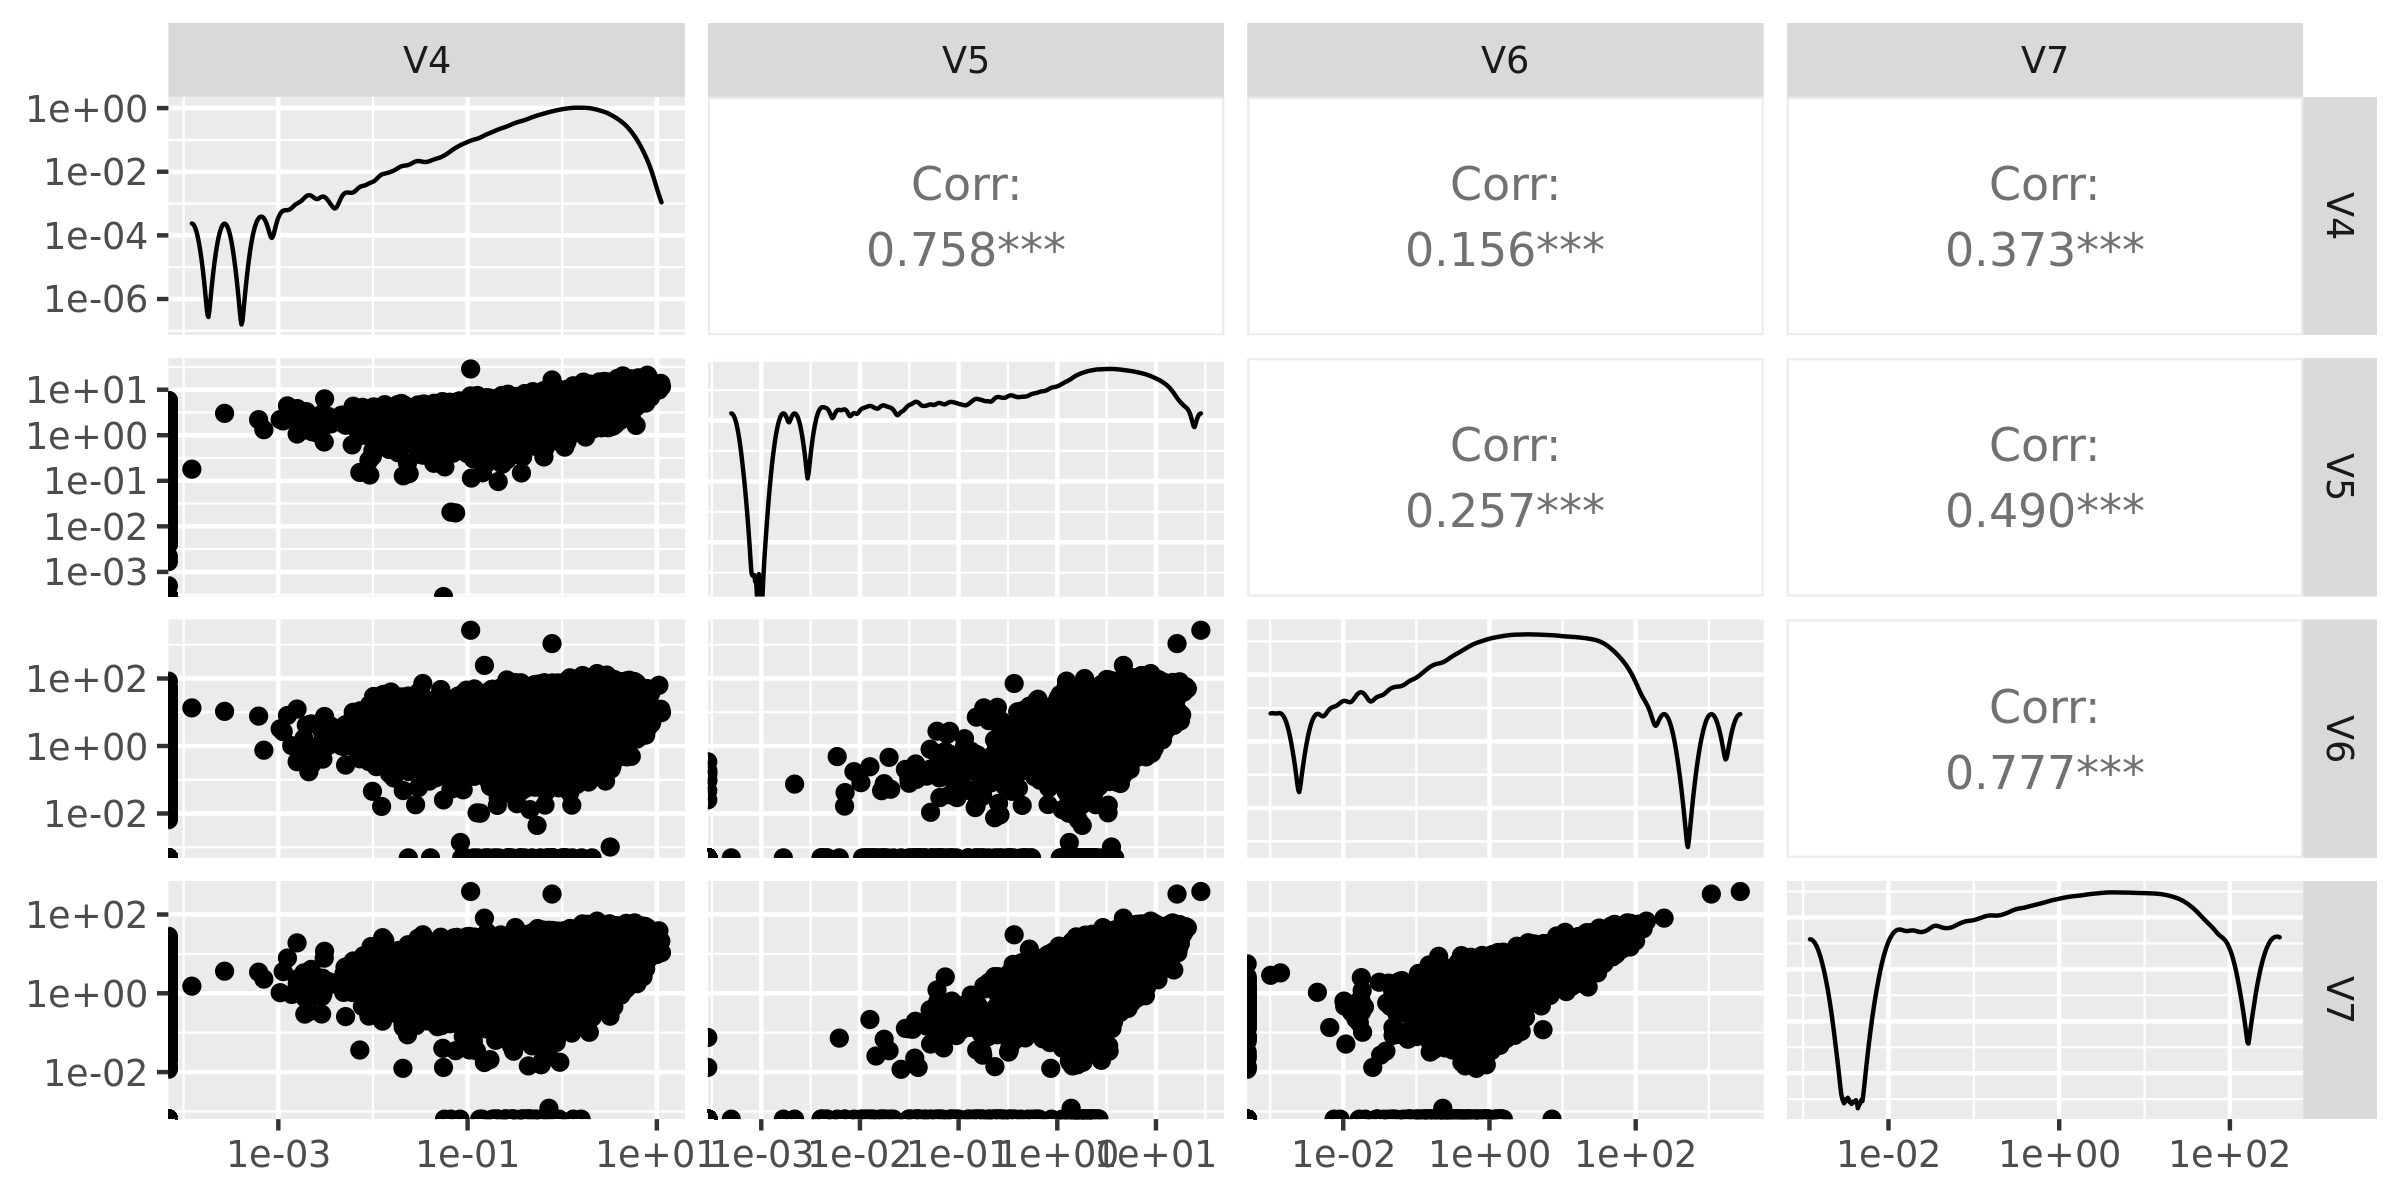

In [164]:
library(GGally)
ggpairs(d[,c('V4','V5','V6','V7')]) + scale_x_log10() + scale_y_log10()


Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 304 rows containing non-finite values (stat_density2d)."


[1] 0.8832383

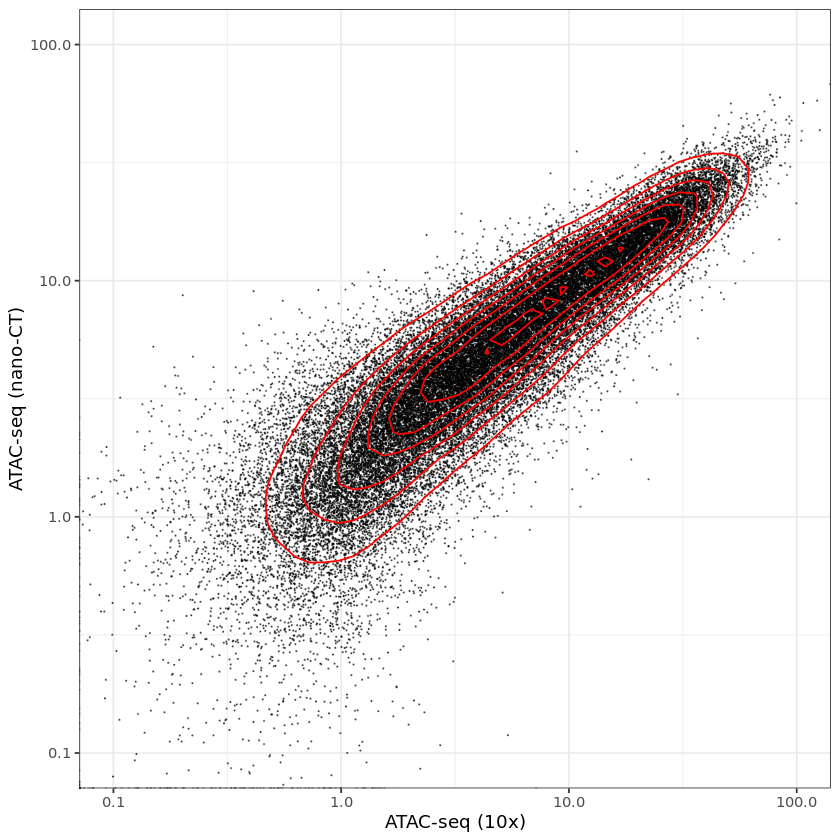

In [115]:
ggplot(d.all,aes(x=V6,y=V7)) + geom_point(size=0.01,alpha=0.5) + scale_x_log10() + scale_y_log10() + 
    geom_density_2d(color='red') + coord_cartesian(xlim=c(0.1,100),ylim=c(0.1,100))+ theme_bw() + 
    xlab('ATAC-seq (10x)') + ylab('ATAC-seq (nano-CT)')

m <- cbind(log10(d.all$V6),log10(d.all$V7))
m <- m[is.finite(m[,1]) & is.finite(m[,2]),]
cor(m[,1],m[,2])

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 1958 rows containing non-finite values (stat_density2d)."


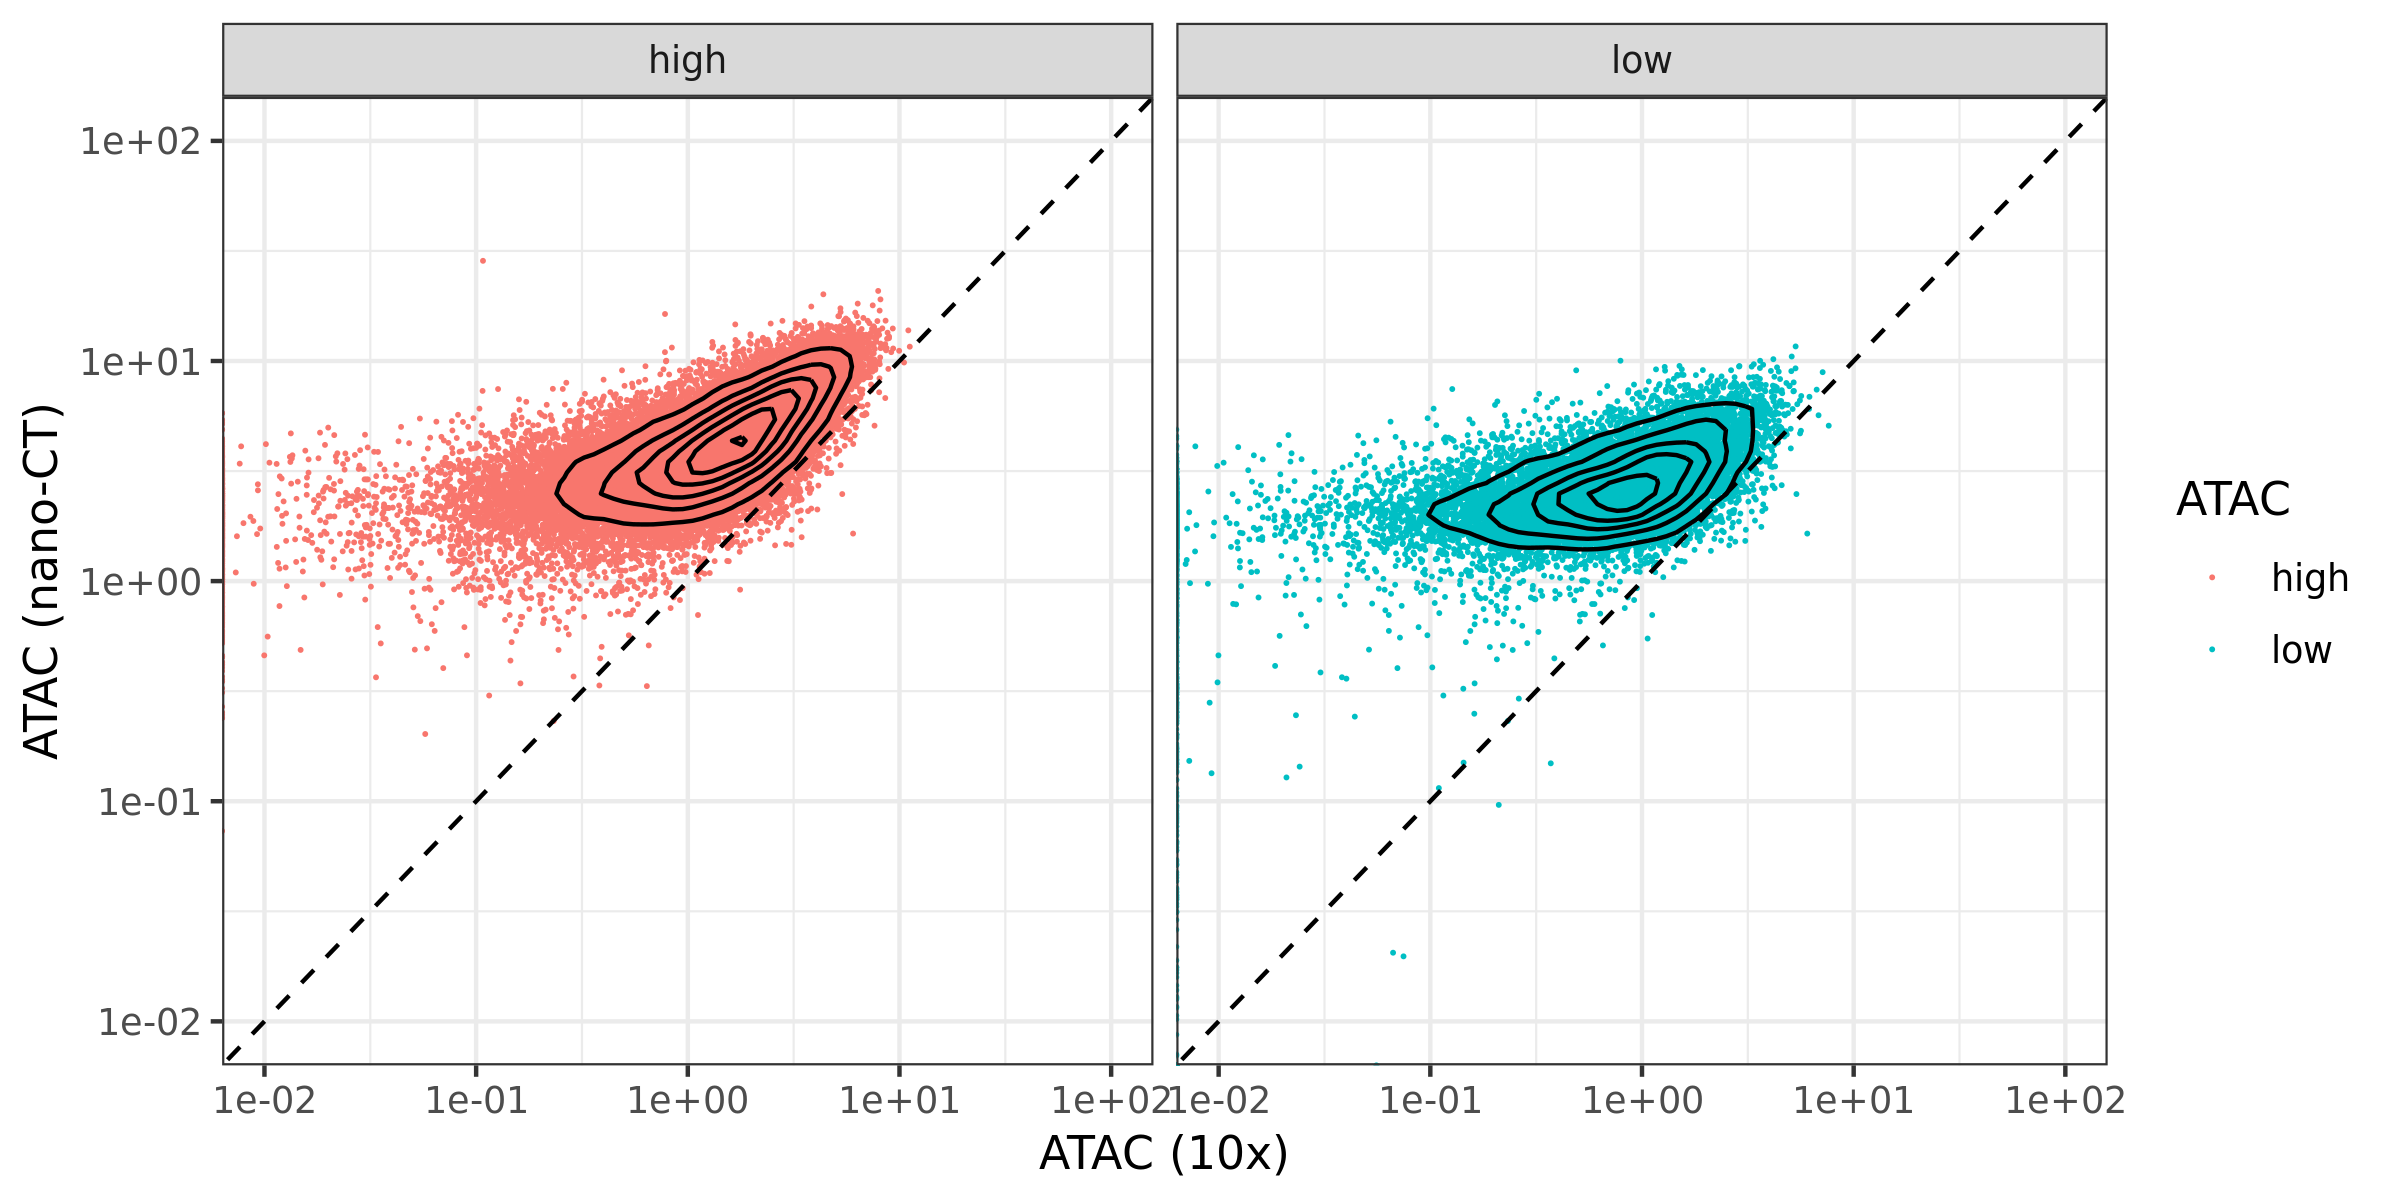

In [221]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

d.low         <- d[d$V6 < quantile(d$V7,0.25),c('V4','V5')]
d.low$ATAC <- 'low'
d.high <- d[d$V7 > quantile(d$V6,0.25),c('V4','V5')]
d.high$ATAC <- 'high'

d.plot <- rbind(d.low,d.high)

ggplot(data = d.plot) + geom_point(aes(x=V4,y=V5,color=ATAC),size=0.001) +
    coord_cartesian(xlim=c(0.01,100),ylim=c(0.01,100)) + geom_density_2d(aes(x=V4,y=V5),color='black') + scale_x_log10() + scale_y_log10() + 
    facet_wrap(~ATAC) +  geom_abline(slope=1,lty=2,lwd=0.5) + theme_bw() + xlab('ATAC (10x)') + ylab('ATAC (nano-CT)')



Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 1665 rows containing non-finite values (stat_density2d)."


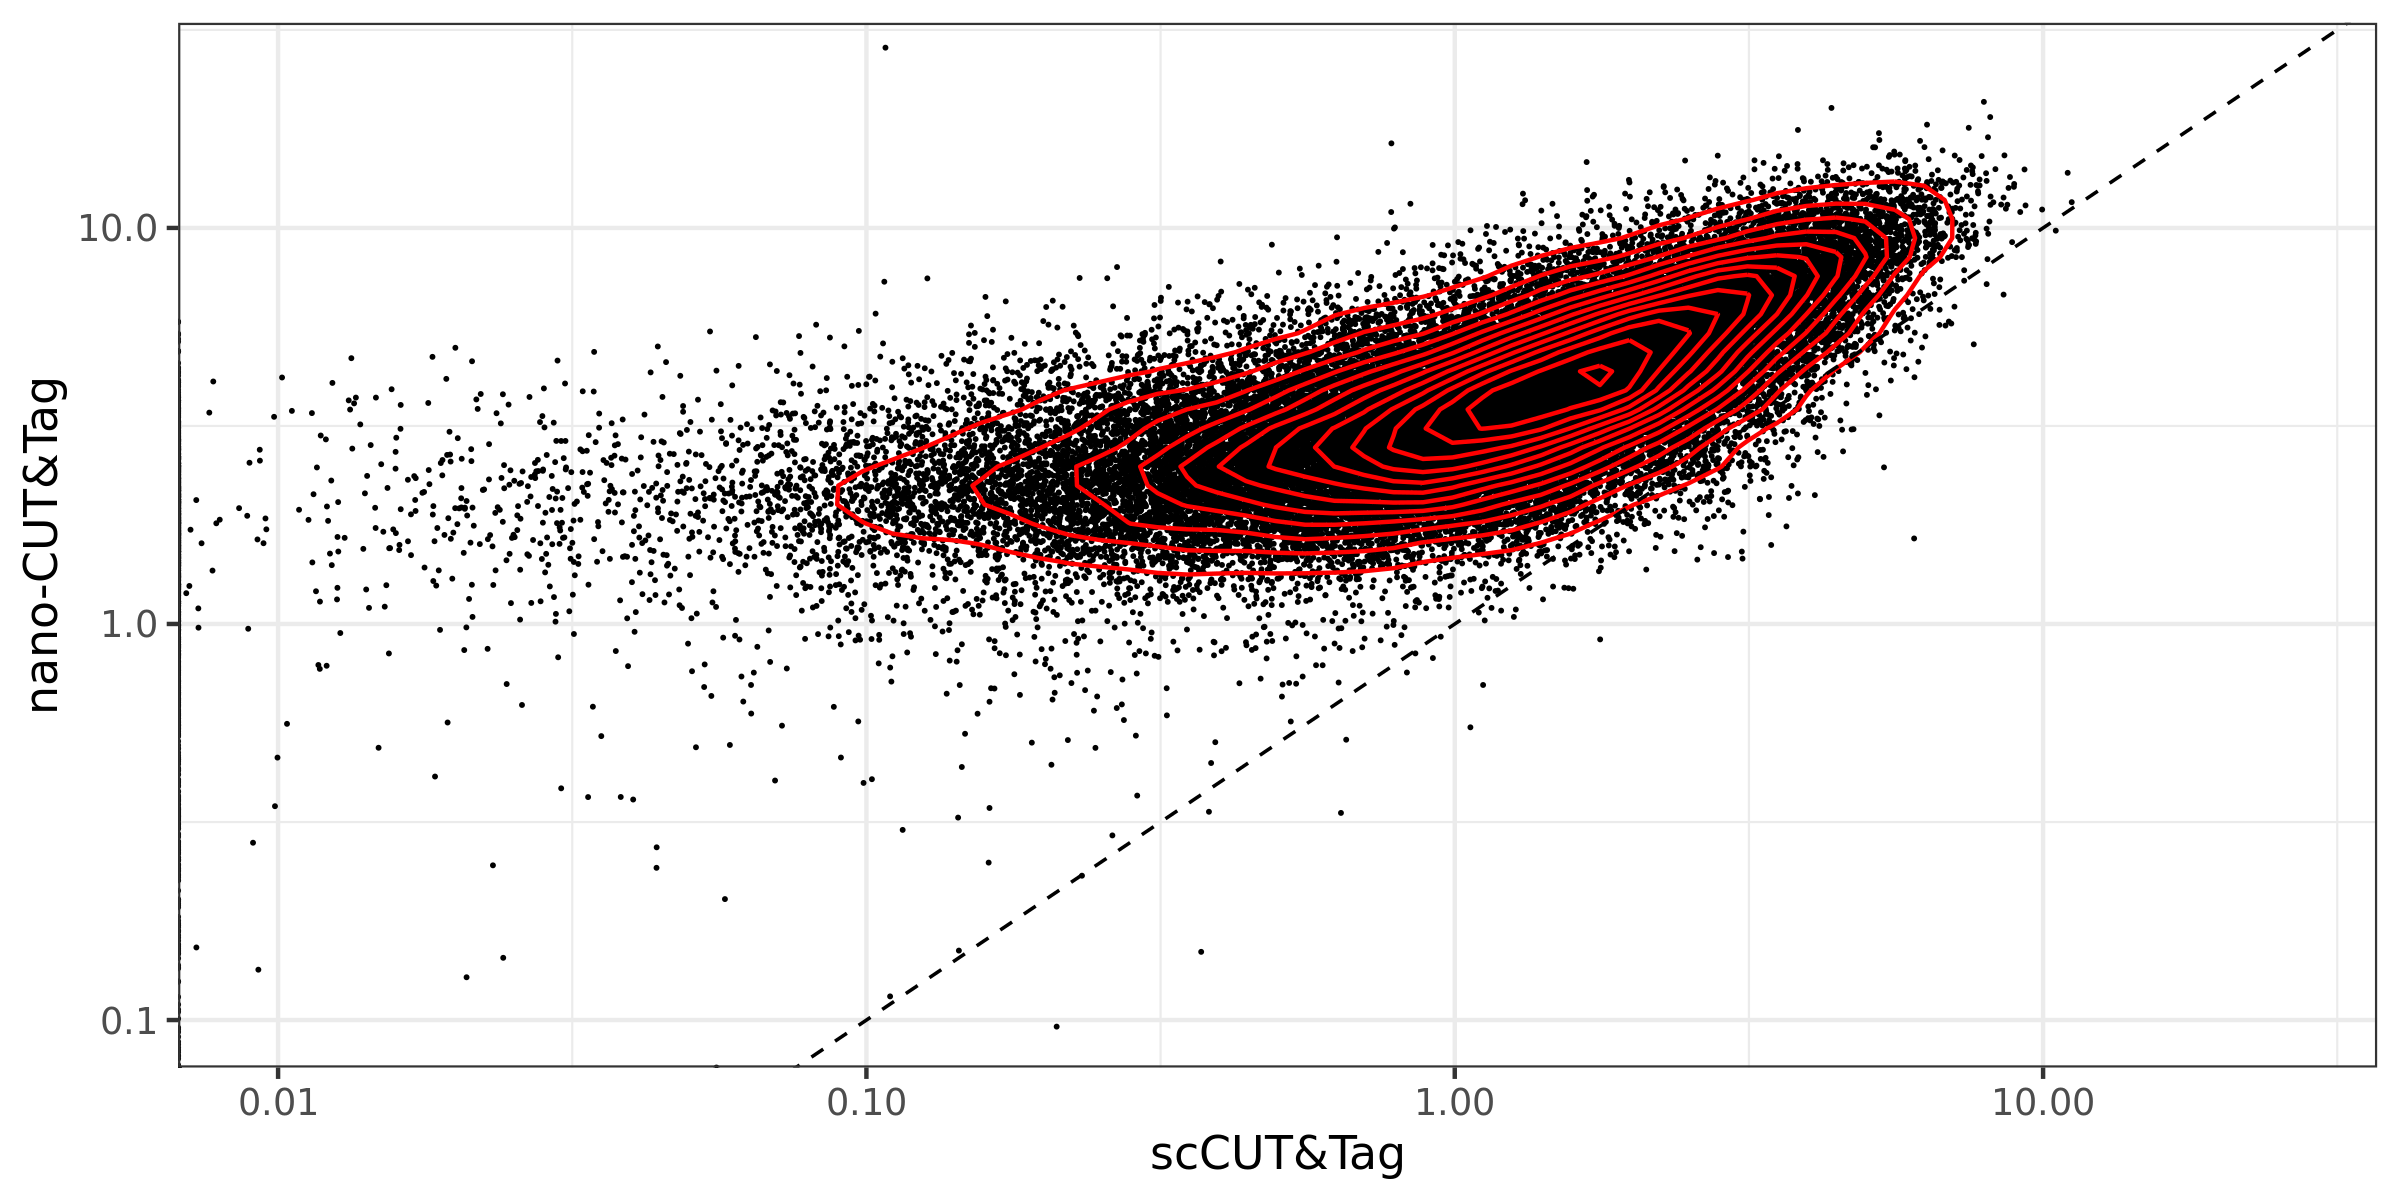

In [255]:
ggplot(data=d, aes(x=V4,y=V5)) + geom_point(size=0.001) + stat_density_2d(color='red') + 
    scale_x_log10() + scale_y_log10() + 
    geom_abline(slope=1,lty=2,lwd=0.4) + 
theme_bw() + xlab("scCUT&Tag") + ylab("nano-CUT&Tag") + coord_cartesian(xlim=c(0.01,25),ylim=c(0.1,25))

Warning message in self$trans$transform(x):
"NaNs produced"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message in self$trans$transform(x):
"NaNs produced"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message in self$trans$transform(x):
"NaNs produced"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message in self$trans$transform(x):
"NaNs produced"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 28142 rows containing non-finite values (stat_density2d)."
Warning message:
"Removed 28142 rows containing missing values (geom_point)."


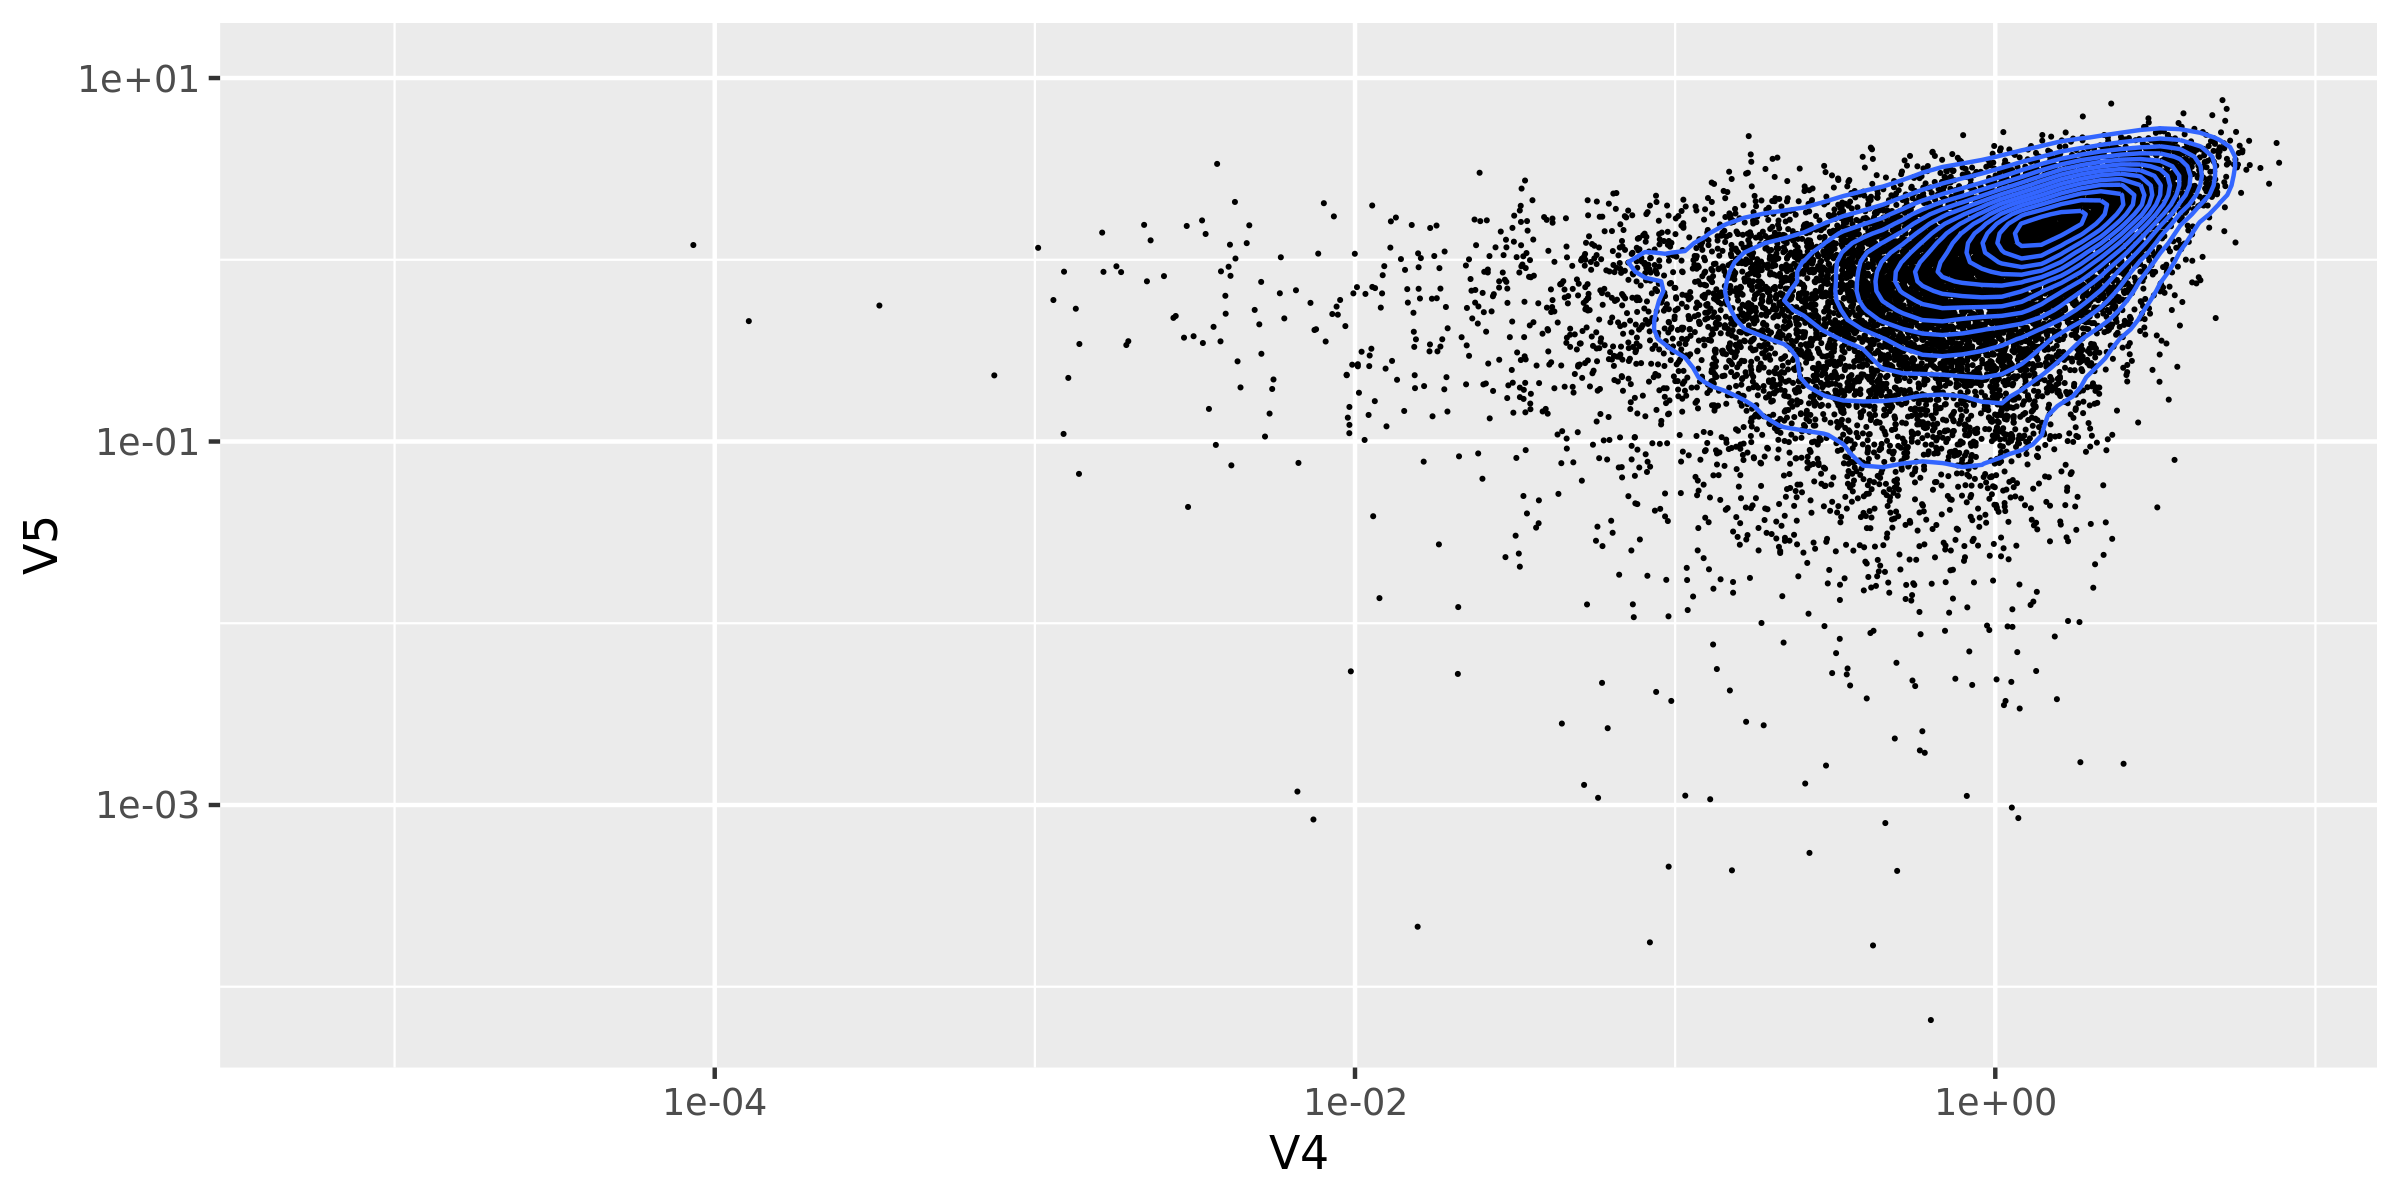

In [217]:
ggplot(as.data.frame(d.zscore),aes(x=V4,y=V5)) + geom_point(size=0.02) + stat_density_2d() + scale_x_log10() + scale_y_log10()

In [251]:
head(d[order(d$V5),],1000)

V1     V2        V3        V4          V5       V6          V7       
1775   chr1   147481047 147483435 0           0        0           0        
4020   chr10   85414385  85415400 0           0        0           0        
6679   chr11  106944196 106946325 0           0        0           0        
7834   chr12   55177457  55178726 0           0        0           0        
7835   chr12   55199244  55201590 0           0        0           0        
7836   chr12   55212051  55213576 0           0        0           0        
7837   chr12   55223378  55224403 0           0        0           0        
7867   chr12   59036792  59038009 0           0        0           0        
8227   chr12   82042456  82044055 0           0        0           0        
10806  chr13  120014242 120015255 0           0        0           0        
10809  chr14    3504089   3505150 0           0        0           0        
11197  chr14   25912788  25915024 0           0        0           0        
11198  chr14   25916842  25917983 0           0        0           0        
11200  chr14   26024491  26029036 0           0        0           0        
11201  chr14   26034199  26037055 0           0        0           0        
11202  chr14   26041344  26043087 0           0        0           0        
11203  chr14   26047003  26050800 0           0        0           0        
11204  chr14   26056116  26059329 0           0        0           0        
11206  chr14   26116199  26120234 0           0        0           0        
11207  chr14   26121311  26123842 0           0        0           0        
11953  chr14   69478142  69479273 0           0        0           0        
11954  chr14   69485794  69488990 0           0        0           0        
11955  chr14   69498965  69500159 0           0        0           0        
11956  chr14   69501927  69504425 0           0        0           0        
11957  chr14   69506758  69507816 0           0        0           0        
11958  chr14   69542849  69545010 0           0        0           0        
11959  chr14   69554712  69556117 0           0        0           0        
11960  chr14   69563451  69565623 0           0        0           0        
11961  chr14   69597982  69598989 0           0        0           0        
11962  chr14   69646874  69648386 0           0        0           0        
<U+22EE> <U+22EE> <U+22EE>  <U+22EE>  <U+22EE>    <U+22EE> <U+22EE>    <U+22EE> 
4769   chr11    7210253   7211591 0.093105154 1.184301  3.98882968 3.8383448
11908  chr14   66140108  66141163 0.000000000 1.185095  0.09913972 0.4317142
13136  chr15   52412355  52414070 0.319684213 1.185123  2.54111733 4.1112880
9279   chr13   31046819  31048160 0.193535135 1.185466  2.28646431 3.1984545
15461  chr16   78451615  78453314 0.031696647 1.185774  3.52627105 3.3451845
8660   chr12  104474829 104476089 0.000000000 1.186198  0.62076897 3.1051590
9811   chr13   55828779  55831364 0.046183398 1.187370  1.26294829 4.2004850
4312   chr10  104681134 104682643 0.267012115 1.187753  0.25113187 0.6697373
37846  chr9    64638426  64639950 0.304403527 1.188058  3.08835818 4.3356466
39329  chrX    95153238  95154376 0.041620683 1.189262  0.26706881 0.8371618
28097  chr5    25815535  25818556 0.318721808 1.190661  0.64476720 0.7883906
14393  chr16   11240499  11241605 0.513898778 1.191812  0.73478690 0.3045913
614    chr1    59897913  59899339 0.002274988 1.192387  0.29524656 0.7862056
26122  chr4    66275658  66277057 0.000000000 1.193124  0.47403559 0.9593428
24247  chr3    93446330  93447912 0.278478647 1.193178  8.23838135 4.6754080
16494  chr17   36047213  36048737 0.000000000 1.194056  0.00000000 0.2210483
33480  chr7    87773293  87774687 0.006981634 1.196045  1.07135751 1.1604647
30484  chr6    33051945  33052949 0.000000000 1.196471  0.69752329 0.0000000
510    chr1    52852055  52854340 1.024776796 1.199770  0.55226657 1.0836117
2528   chr1   183866058 183867443 0.000000000 1.199987  0.97544040 1.5206938